In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(columns = ['User ID','Gender'], inplace= True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.3, random_state=42)

In [6]:
xtrain.shape,  xtest.shape, ytrain.shape, ytest.shape

((280, 2), (120, 2), (280,), (120,))

# StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(xtrain, ytrain)

StandardScaler()

In [8]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [9]:
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [10]:
xtrain.head()

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000


In [11]:
xtrain_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [12]:
print(xtrain, xtrain_scaled)

     Age  EstimatedSalary
157   29            75000
109   38            80000
17    45            26000
347   54           108000
24    46            23000
..   ...              ...
71    24            27000
106   26            35000
270   43           133000
348   39            77000
102   32            86000

[280 rows x 2 columns] [[-0.84252154  0.1301563 ]
 [ 0.04175763  0.2777019 ]
 [ 0.72953032 -1.31579061]
 [ 1.61380949  1.10395728]
 [ 0.82778356 -1.40431797]
 [-1.43204099 -1.25677236]
 [-0.05649561  0.1301563 ]
 [ 0.43477059 -0.16493491]
 [-0.2530021   0.01211982]
 [ 1.31904976  2.22530386]
 [ 0.14001087  0.74984783]
 [-1.33378775  0.54328399]
 [ 2.00682245  0.72033871]
 [-1.23553451 -1.43382709]
 [ 0.33651735 -0.34198963]
 [-0.94077478  0.54328399]
 [ 0.43477059  0.2777019 ]
 [ 0.43477059  1.10395728]
 [ 0.82778356  0.74984783]
 [ 0.9260368   1.25150288]
 [-0.44950858 -1.25677236]
 [-1.82505395 -1.34529973]
 [ 1.12254328  0.54328399]
 [-0.64601506 -1.64039093]
 [-0.7442683   0

In [13]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=xtest.columns)

In [14]:
np.round(xtrain_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


# Effect of Scaling

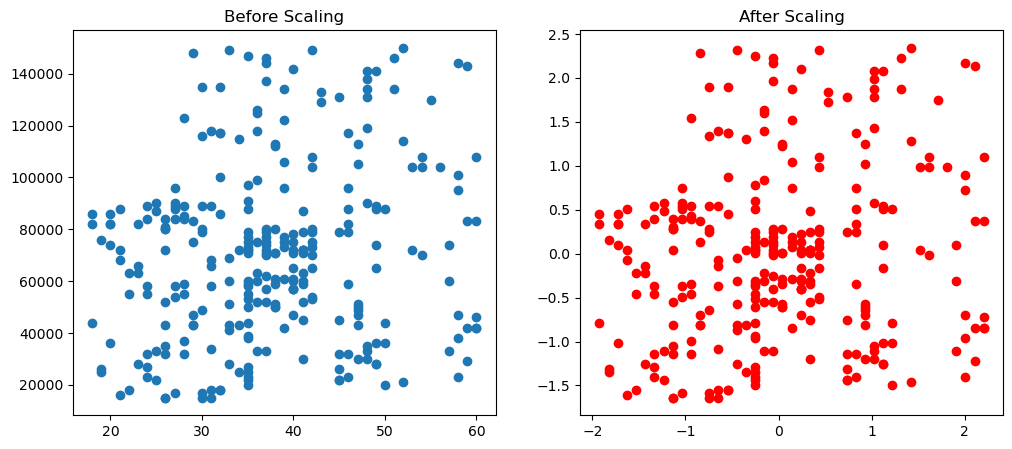

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.scatter(xtrain['Age'], xtrain['EstimatedSalary'])
ax1.set_title('Before Scaling')


ax2.scatter(xtrain_scaled['Age'], xtrain_scaled['EstimatedSalary'], color='red')  # Assuming xtrain_scaled is a NumPy array
ax2.set_title('After Scaling')


plt.show()

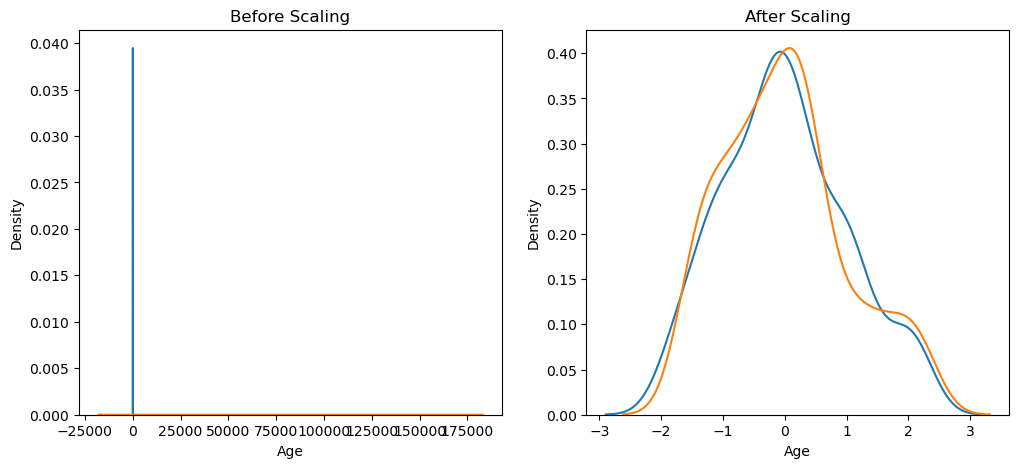

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.set_title('Before Scaling')
sns.kdeplot(xtrain['Age'], ax=ax1)
sns.kdeplot(xtrain['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(xtrain_scaled['Age'], ax=ax2)  
sns.kdeplot(xtrain_scaled['EstimatedSalary'], ax=ax2)  


plt.show()

# Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(xtrain, ytrain)
lr_scaled.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [20]:
y_pred = lr.predict(xtest)
y_pred_scaled = lr_scaled.predict(xtest_scaled)

In [21]:
from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(ytest,y_pred))
print("Scaled",accuracy_score(ytest,y_pred_scaled))

Actual 0.6083333333333333
Scaled 0.85


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(xtrain, ytrain)
dt_scaled.fit(xtrain_scaled, ytrain)

y_pred_dt = dt.predict(xtest)
y_pred_scaled_dt = dt_scaled.predict(xtest_scaled)

print("Actual",accuracy_score(ytest,y_pred_dt))
print("Scaled",accuracy_score(ytest,y_pred_scaled_dt))

Actual 0.8666666666666667
Scaled 0.85


# Effect of Outliers

In [23]:
df = df.append(pd.DataFrame({'Age':[34,45,56],'EstimatedSalary':[43564,456436,43532],'Purchased':[0.0,1,0.0]}))
df

C:\Users\Hp\AppData\Local\Temp\ipykernel_14224\4253770851.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[34,45,56],'EstimatedSalary':[43564,456436,43532],'Purchased':[0.0,1,0.0]}))


,Age,EstimatedSalary,Purchased
0,19,19000,0.0
1,35,20000,0.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,0.0
...,...,...,...
398,36,33000,0.0
399,49,36000,1.0
0,34,43564,0.0
1,45,456436,1.0


In [24]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

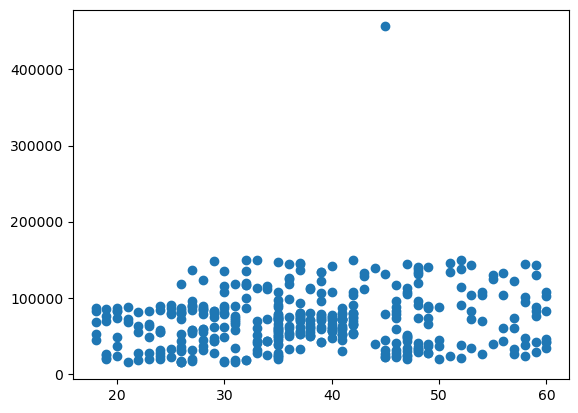

In [25]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)


x_train.shape, x_test.shape

((282, 2), (121, 2))

In [27]:
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

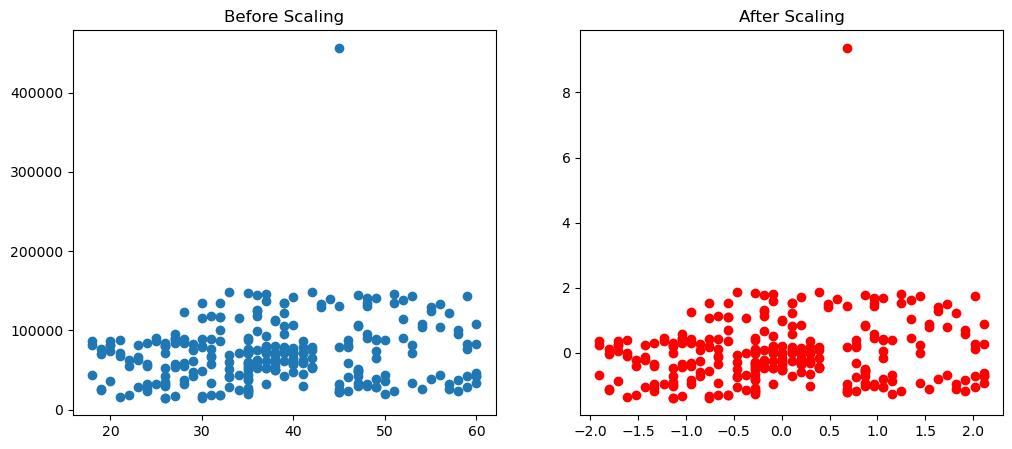

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()